<a href="https://colab.research.google.com/github/RodrigoAnt93/Exercicio-Casa-Senac/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final Curso Machine Learning SENAC**

# **Analisando as vendas de jogos dos principais consoles do mundo:**

**Vamos verificar como foi as vendas de jogos das principais fabricantes de consoles do mundo. A análise será de 2005 à 2017 focando nos mercados do: EUA, União Europeia, Japão e vendas global.**

dataset: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Primeiro vamos tratar os dados para pegar só os consoles que queremos analisar:**

In [231]:
# Vamos usar esse dataset das vendas de jogos de vários consoles:
venda_jg= pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv', encoding = "ISO-8859-1")

In [232]:
# Vamos ver as primeiras e últimas linhas do dataset para entender como ele foi montado:
display(venda_jg.head(10))
display(venda_jg.tail(10))

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16709,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.0,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN
16710,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,Atari,T
16711,Aiyoku no Eustia,PSV,2014.0,Misc,dramatic create,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16713,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
# Vamos ver quantas colunas tem e se estão preenchidas:
display(venda_jg.info())
print()
display(venda_jg.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


None

(16719, 16)

In [234]:
# A quantidade da jogos por consoles:
venda_jg['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Os consoles que analisaremos serão:**

*   PS3 = Playstation 3 (Sony Playstation, Japão)
*   PS4 = Playstation 4 (Sony Playstation, Japão)

*   X360 = Xbox X360 (Microsoft Xbox, EUA)
*   XOne = Xbox One (Microsoft Xbox, EUA)

*   Wii = Nintendo Wii (Nintendo, Japão)
*   3DS = Nintendo 3DS (Nintendo, Japão)











In [235]:
# Filtraremos o dataset pelos index desejados:
consoles = venda_jg[venda_jg['Platform'].isin(['PS3', 'PS4', 'X360', 'XOne', 'Wii', '3DS'])]

In [236]:
# Excluímos as colunas não desejadas:
consoles.drop(columns= ['Publisher', 'Critic_Count', 'User_Count'], inplace= True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [237]:
# Como ficou o dataset depois o tratamento:
consoles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5073 entries, 0 to 16715
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5073 non-null   object 
 1   Platform         5073 non-null   object 
 2   Year_of_Release  4976 non-null   float64
 3   Genre            5073 non-null   object 
 4   NA_Sales         5073 non-null   float64
 5   EU_Sales         5073 non-null   float64
 6   JP_Sales         5073 non-null   float64
 7   Other_Sales      5073 non-null   float64
 8   Global_Sales     5073 non-null   float64
 9   Critic_Score     2910 non-null   float64
 10  User_Score       3016 non-null   float64
 11  Developer        3742 non-null   object 
 12  Rating           3675 non-null   object 
dtypes: float64(8), object(5)
memory usage: 554.9+ KB


In [238]:
COLUNAS = ['Nome', 'Console', 'Ano_Lançamento', 'Gênero',
           'EUA_venda', 'UE_venda', 'JP_venda', 'Outros_vendas', 'Global_vendas',
           'Nota_Crítica', 'Usuário_Crítica', 'Desenvolvedora', 'Classificação']

In [239]:
# Colocaremos os nomes das colunas em português: 
consoles.columns = COLUNAS

In [240]:
consoles.head()

,Nome,Console,Ano_Lançamento,Gênero,EUA_venda,UE_venda,JP_venda,Outros_vendas,Global_vendas,Nota_Crítica,Usuário_Crítica,Desenvolvedora,Classificação
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,6.6,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,Nintendo,E


In [241]:
# Separaremos os consoles em suas variáveis para facilitar a análise:
PS3 = consoles[consoles['Console'] == 'PS3']
PS4 = consoles[consoles['Console'] == 'PS4']
X360 = consoles[consoles['Console'] == 'X360']
XOne = consoles[consoles['Console'] == 'XOne']
Wii = consoles[consoles['Console'] == 'Wii']
DS3 = consoles[consoles['Console'] == '3DS']

*Com o dataset já tratado, podemos começar as análises.*

# **Iremos analisar 3 coisas:**

1.   Vendas de jogos nos maiores mercados e em todo mundo.
1.   Gêneros de jogos mais jogados nos: EUA, Europa e Japão.
2.   Interferência da classificação nas vendas dos jogos. (Machine Learning)







# **1.   Vendas de jogos nos maiores mercados e em todo mundo.**



In [242]:
# Saber o intervalo de anos que os jogos do dataset foram lançados.
display(consoles['Ano_Lançamento'].max())
display(consoles['Ano_Lançamento'].min())

2017.0

2005.0

In [243]:
# Criando as variáveis de cada região para poder analisar individualmente:
con_game = 'PS3', 'PS4', 'X360', 'XOne', 'Wii', '3DS'
Y_vendas = [PS3.Global_vendas.sum( ), PS4.Global_vendas.sum(), X360.Global_vendas.sum(), XOne.Global_vendas.sum(), Wii.Global_vendas.sum(), DS3.Global_vendas.sum()]
Y_jp = [PS3.JP_venda.sum( ), PS4.JP_venda.sum(), X360.JP_venda.sum(), XOne.JP_venda.sum( ), Wii.JP_venda.sum( ), DS3.JP_venda.sum( )]
Y_ue = [PS3.UE_venda.sum( ), PS4.UE_venda.sum( ), X360.UE_venda.sum( ), XOne.UE_venda.sum( ), Wii.UE_venda.sum( ), DS3.UE_venda.sum( )]
Y_eua = [PS3.EUA_venda.sum( ), PS4.EUA_venda.sum( ), X360.EUA_venda.sum( ), XOne.EUA_venda.sum( ), Wii.EUA_venda.sum( ), DS3.EUA_venda.sum( )]

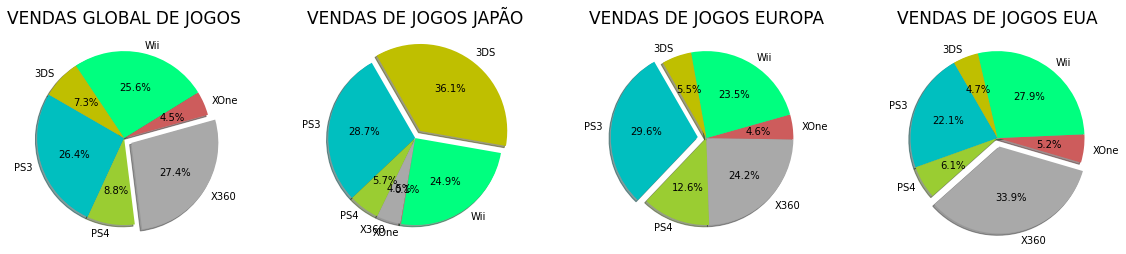

In [244]:
# Gráfico com as porcentagens de vendas de jogos nos principais mercados e no mundo:

from matplotlib import axes
fig, axes = plt.subplots(1, 4 , figsize= (20, 4))
cores = ['c', 'yellowgreen', 'darkgray', 'indianred', 'springgreen', 'y']

axes[0].pie(Y_vendas, labels = con_game, colors= cores, autopct= '%1.1f%%', startangle= 150, shadow= True, explode= (0, 0, 0.10, 0, 0, 0))
axes[0].set_title('VENDAS GLOBAL DE JOGOS', fontsize = 17)


axes[1].pie(Y_jp, labels = con_game, colors = cores, autopct= '%1.1f%%', startangle= 120, shadow= True, explode= (0, 0, 0, 0, 0, 0.10))
axes[1].set_title('VENDAS DE JOGOS JAPÃO', fontsize = 17)

axes[2].pie(Y_ue, labels = con_game, colors = cores, autopct= '%1.1f%%', startangle= 120, shadow= True, explode= (0.10, 0, 0, 0, 0, 0))
axes[2].set_title('VENDAS DE JOGOS EUROPA', fontsize = 17)

axes[3].pie(Y_eua, labels = con_game, colors = cores, autopct= '%1.1f%%', startangle= 120, shadow= True, explode= (0, 0, 0.10, 0, 0, 0))
axes[3].set_title('VENDAS DE JOGOS EUA', fontsize = 17)
plt.show()

In [245]:
# Análise dos jogos do 3DS mais vendidos no mundo:
display(DS3.head(20))

,Nome,Console,Ano_Lançamento,Gênero,EUA_venda,UE_venda,JP_venda,Outros_vendas,Global_vendas,Nota_Crítica,Usuário_Crítica,Desenvolvedora,Classificação
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN
40,Mario Kart 7,3DS,2011.0,Racing,5.03,4.02,2.69,0.91,12.66,85.0,8.2,"Retro Studios, Entertainment Analysis & Develo...",E
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,NaN,NaN
53,Super Mario 3D Land,3DS,2011.0,Platform,4.89,3.00,2.14,0.78,10.81,90.0,8.4,Nintendo,E
62,New Super Mario Bros. 2,3DS,2012.0,Platform,3.66,3.14,2.47,0.63,9.90,78.0,7.2,Nintendo,E
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,2.03,2.36,4.39,0.39,9.16,88.0,8.7,Nintendo,E
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,7.14,NaN,NaN,NaN,NaN
184,Tomodachi Life,3DS,2013.0,Simulation,0.97,2.11,1.90,0.24,5.23,NaN,NaN,NaN,NaN
235,Luigi's Mansion: Dark Moon,3DS,2013.0,Action,1.80,1.39,1.11,0.29,4.59,86.0,8.4,Next Level Games,E


In [246]:
# Análise das vendas de jogos entre 2013 e 2017. Em 2013 o PS4 e o XOne foram lançados e em 2017 o PS3 e o X360 pararam de receber jogos.
jg_1 = consoles[consoles['Ano_Lançamento'] >= 2013]
pd.crosstab(index= jg_1['Console'],
            columns= jg_1['Global_vendas'].max())

col_0,21.04
Console,
3DS,303
PS3,345
PS4,393
Wii,23
X360,186
XOne,247


**Conclusões**:

*   Mesmo o Xbox 360 sendo o console que mais vendeu jogos de 2005 à 2017, a Microsoft Xbox não lidera o mercado global de vendas e perde para a Nintendo e o Sony Playstation.

*   Como o mercado local pesa na hora das vendas. A Microsoft Xbox domina o mercado norte americano com quase 40% de todos os jogos vendidos. O mesmo acontece no Japão onde a Nintendo domina 61% das vendas de jogos e a Sony Playstation vende 35%. A Microsoft Xbox praticamente não encontra mercado no Japão.

*   Boa parte das vendas global de jogos do 3DS acontecem no Japão e sempre sendo puxados pelos seus 3 carros chefes: Mário, Pokemon e Zelda.

*   Mesmo com consoles de PS3 e X360 sendo vendidos desde 2005, o PS4 e o XOne chegam com força no mercado em 2013. Entre 2013 e 2017 os consoles mais novos da Sony e da Microsoft vendem mais jogos que seus antecessores.







# **2.   Gêneros de jogos mais vendidos nos: EUA, Europa e Japão.**



Action          1357
Sports           801
Misc             625
Shooter          510
Role-Playing     383
Racing           339
Adventure        285
Fighting         222
Simulation       199
Platform         165
Strategy         101
Puzzle            86
Name: Gênero, dtype: int64


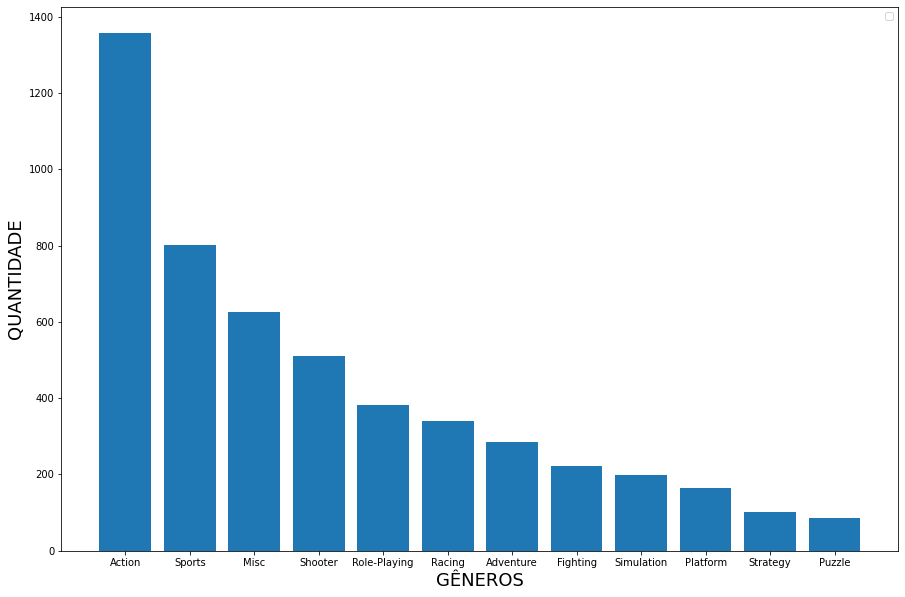

In [247]:
# Gêneros mais lançados do mundo:
print(consoles['Gênero'].value_counts())
gen_jg = 'Action', 'Sports', 'Misc', 'Shooter', 'Role-Playing', 'Racing', 'Adventure', 'Fighting', 'Simulation', 'Platform', 'Strategy', 'Puzzle'
num_jg = 1357, 801, 625, 510, 383, 339, 285, 222, 199, 165, 101, 86

plt.rcParams['figure.figsize'] = (15, 10)
plt.bar(gen_jg, num_jg)
plt.xlabel('GÊNEROS', fontsize= 18)
plt.ylabel('QUANTIDADE', fontsize= 18)
plt.legend()
plt.show()


In [248]:
# Os gêneros mais comprados no Japão:
display(pd.crosstab(consoles['Gênero'], consoles['Console'], values= consoles['JP_venda'], aggfunc = 'sum', margins= True, margins_name= 'Total').sort_values('Total'))
jpn_top5 = consoles.sort_values('JP_venda', ascending=False)
# Os 5 jogos mais vendidos na Japão:
print()
jpn_top5.head(5)


Console,3DS,PS3,PS4,Wii,X360,XOne,Total
Gênero,,,,,,,
Puzzle,1.80,0.10,0.00,1.50,0.15,NaN,3.55
Strategy,0.85,1.16,0.16,1.74,0.13,0.00,4.04
Adventure,2.76,2.68,0.45,1.17,0.61,0.03,7.70
Racing,2.83,3.13,0.26,4.11,0.52,0.05,10.90
Simulation,10.39,1.27,0.18,1.98,0.70,0.00,14.52
Fighting,3.22,6.56,0.75,3.67,0.96,0.01,15.17
Shooter,0.20,8.81,2.81,0.64,3.10,0.16,15.72
Platform,6.48,0.61,0.49,11.24,0.02,0.00,18.84
Misc,5.51,1.41,0.42,14.48,0.45,0.01,22.28


,Nome,Console,Ano_Lançamento,Gênero,EUA_venda,UE_venda,JP_venda,Outros_vendas,Global_vendas,Nota_Crítica,Usuário_Crítica,Desenvolvedora,Classificação
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,Nintendo,E
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,2.03,2.36,4.39,0.39,9.16,88.0,8.7,Nintendo,E
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E


In [249]:
# Os gêneros mais comprados no EUA:
display(pd.crosstab(consoles['Gênero'], consoles['Console'], consoles['EUA_venda'], aggfunc = 'sum', margins= True, margins_name= 'Total',).sort_values('Total'))
eua_top5 = consoles.sort_values('EUA_venda', ascending=False)
# Os 5 jogos mais vendidos na EUA:
print()
eua_top5.head(5)


Console,3DS,PS3,PS4,Wii,X360,XOne,Total
Gênero,,,,,,,
Puzzle,1.30,0.39,0.00,9.10,0.62,NaN,11.41
Strategy,0.78,1.88,0.17,2.32,6.50,0.27,11.92
Adventure,1.18,8.79,1.95,10.86,8.44,1.27,32.49
Simulation,7.58,4.30,0.21,23.30,8.51,0.32,44.22
Fighting,4.46,23.88,3.60,12.83,24.61,1.65,71.03
Platform,13.27,13.34,2.45,47.23,6.09,0.51,82.89
Racing,6.35,23.89,2.61,30.95,33.10,4.36,101.26
Role-Playing,23.76,29.93,9.34,5.48,44.75,6.15,119.41
Misc,2.69,22.68,3.14,118.82,63.66,4.77,215.76


,Nome,Console,Ano_Lançamento,Gênero,EUA_venda,UE_venda,JP_venda,Outros_vendas,Global_vendas,Nota_Crítica,Usuário_Crítica,Desenvolvedora,Classificação
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,21.81,61.0,6.3,Good Science Studio,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,Nintendo,E


In [250]:
# Os gêneros mais comprados na Europa:
display(pd.crosstab(consoles['Gênero'], consoles['Console'], values= consoles['UE_venda'], aggfunc = 'sum', margins= True, margins_name= 'Total',).sort_values('Total'))
ue_top5 = consoles.sort_values('UE_venda', ascending=False)
# Os 5 jogos mais vendidos na Europa:
print()
ue_top5.head(5)


Console,3DS,PS3,PS4,Wii,X360,XOne,Total
Gênero,,,,,,,
Strategy,0.35,1.25,0.21,0.71,2.53,0.11,5.16
Puzzle,2.15,0.04,0.02,3.54,0.04,NaN,5.79
Adventure,0.79,7.71,3.00,4.37,4.54,1.17,21.58
Simulation,8.12,3.52,0.68,7.59,3.77,0.31,23.99
Fighting,2.21,14.11,2.97,5.01,8.57,0.54,33.41
Platform,10.51,10.96,3.60,23.50,4.06,0.34,52.97
Role-Playing,14.91,18.44,11.96,1.88,17.87,3.43,68.49
Racing,4.69,32.87,7.45,19.66,25.03,4.58,94.28
Misc,2.38,16.16,3.35,63.93,19.79,2.00,107.61


,Nome,Console,Ano_Lançamento,Gênero,EUA_venda,UE_venda,JP_venda,Outros_vendas,Global_vendas,Nota_Crítica,Usuário_Crítica,Desenvolvedora,Classificação
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,6.6,Nintendo,E
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,21.04,97.0,8.2,Rockstar North,M


**Conclusões:**

*   O gênero 'Action' tem um grande volume de lançamentos, mas mal aparece no top 5 de vendas em cada região.
*   A cultura de cada país refletindo nas vendas de jogos. Os EUA tem uma forte cultura armamentista e justamente jogos de tiro ficam em segundo lugar. Já a UE tem forte cultura em esportes, principalmente futebol, e tem como segundo gênero mais vendido os jogos de 'Sports'
*   A tradição em jogos RPG no Japão é muito forte, o que faz os jogos de 'Role-Playing' no 3DS ter o dobro de vendas comparado com o segundo gênero mais vendido. A quantidade de vendas de 'Role-Playing' no 3DS é tão grande que faz esse gênero ser o mais vendido no país, mesmo com os dados dos outros consoles.



# **Analisando as vendas por classificação. (Machine Learning)**

In [251]:
import seaborn as sns
import sklearn as sk

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
# Criando uma cópia do dataset:
con_ML = consoles.copy()

In [254]:
# Analisando como está os campos vazios da coluna 'Classificação':
con_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5073 entries, 0 to 16715
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome             5073 non-null   object 
 1   Console          5073 non-null   object 
 2   Ano_Lançamento   4976 non-null   float64
 3   Gênero           5073 non-null   object 
 4   EUA_venda        5073 non-null   float64
 5   UE_venda         5073 non-null   float64
 6   JP_venda         5073 non-null   float64
 7   Outros_vendas    5073 non-null   float64
 8   Global_vendas    5073 non-null   float64
 9   Nota_Crítica     2910 non-null   float64
 10  Usuário_Crítica  3016 non-null   float64
 11  Desenvolvedora   3742 non-null   object 
 12  Classificação    3675 non-null   object 
dtypes: float64(8), object(5)
memory usage: 554.9+ KB


*   Irei apagar as linhas onde existe 'NaN' na coluna 'Classificação'. Acredito que seja melhor diminuir o tamanho da amostra do que tantos campos vazios.



In [255]:
con_ML.dropna(subset=['Classificação'], inplace=True)

In [256]:
# Como ficou o dataset depois do tratamento:
con_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 16692
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome             3675 non-null   object 
 1   Console          3675 non-null   object 
 2   Ano_Lançamento   3606 non-null   float64
 3   Gênero           3675 non-null   object 
 4   EUA_venda        3675 non-null   float64
 5   UE_venda         3675 non-null   float64
 6   JP_venda         3675 non-null   float64
 7   Outros_vendas    3675 non-null   float64
 8   Global_vendas    3675 non-null   float64
 9   Nota_Crítica     2876 non-null   float64
 10  Usuário_Crítica  2978 non-null   float64
 11  Desenvolvedora   3675 non-null   object 
 12  Classificação    3675 non-null   object 
dtypes: float64(8), object(5)
memory usage: 402.0+ KB


In [257]:
# Também excluirei os 'NaN' da coluna 'Ano_Lançamento' por serem poucos:
con_ML.dropna(subset=['Ano_Lançamento'], inplace=True)

As classificações se dividem em:

*   EC = Livre
*   E = 6 à 9 anos
*   E10+ = 10 à 12 anos
*   T = 13 à 16 anos
*   M = 17 anos





In [258]:
# A quantidade de jogos por classificação:
con_ML['Classificação'].value_counts()

E       1133
T       1050
M        739
E10+     682
EC         2
Name: Classificação, dtype: int64

Dividiremos as classificações em 2 grupos: 

*   EC, E, E10+ = 0
*   T, M = 1

O grupo '0' será formados por classificações mais brandas e o grupo '1' por classificações mais limitadas devido as idades permitidas.

In [259]:
# Fazendo a separação com a função 'MAP':
con_ML_map = {'E' : 0, 'E10+' : 0, 'EC' : 0, 'T': 1, 'M': 1}

In [260]:
con_ML['Classificação'] = con_ML['Classificação'].map(con_ML_map)

In [261]:
# A coluna 'Classificação' já se encontrar preenchida com 0 ou 1:
con_ML.head()

,Nome,Console,Ano_Lançamento,Gênero,EUA_venda,UE_venda,JP_venda,Outros_vendas,Global_vendas,Nota_Crítica,Usuário_Crítica,Desenvolvedora,Classificação
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,8.0,Nintendo,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,Nintendo,0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,Nintendo,0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,6.6,Nintendo,0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,Nintendo,0


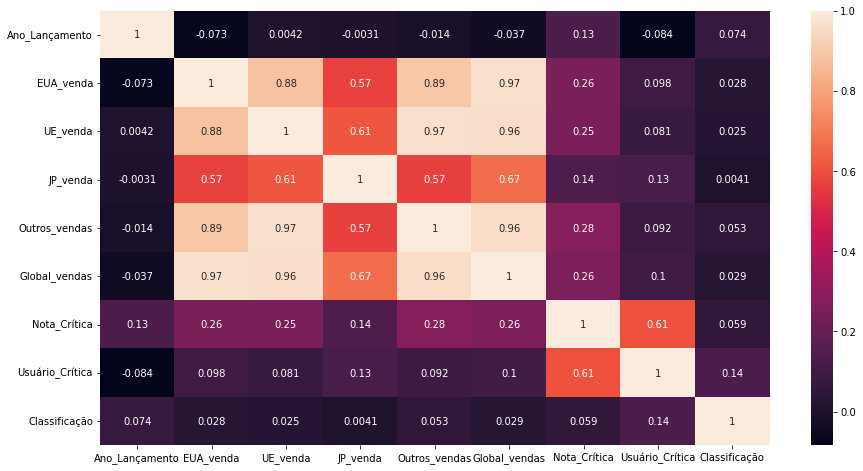

In [262]:
# Primeira análise com uma gráfico de correlação:
correlacao = con_ML.corr()
ax = sns.heatmap(correlacao, annot=True)
sns.color_palette('pastel')
ax.figure.set_size_inches(15, 8)



*   O gráfico acima já mostra uma fraca correlação entre os números de vendas com a classificação dos jogos. Mas, mesmo assim vamos passar esses dados em um método para ser estudado melhor.



In [263]:
# Com a classificação divida em dois grupos temos uma amostra bem balanceada:
num_true = len(con_ML.loc[con_ML['Classificação'] == True])
num_false = len(con_ML.loc[con_ML['Classificação'] == False])
print(f'Número do grupo 1: {num_true} ({(num_true/ (num_true + num_false)) * 100:.2f})%')
print(f'Número do grupo 0: {num_false} ({(num_false/ (num_true + num_false)) * 100:.2f})%')

Número do grupo 1: 1789 (49.61)%
Número do grupo 0: 1817 (50.39)%


In [264]:
# Seleção de variáveis preditoras (Aquelas que serão estudas):
atributos = ['Ano_Lançamento',	'EUA_venda',	'UE_venda',	'JP_venda',	'Outros_vendas',	'Global_vendas',	'Nota_Crítica',	'Usuário_Crítica']

In [265]:
# Variável a ser prevista(Aquela que guarda o resultado esperado):
atrib_prev = ['Classificação']

In [266]:
# Criando objetos para converter para array:
X = con_ML[atributos].values
Y = con_ML[atrib_prev].values

In [267]:
# Definindo a taxa de split (Taxa de partição do conjunto de teste):
split_test_size = 0.30 # 30% da amostra vai ser reservada para teste.

In [268]:
# Criando dados de treino e de teste:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=  split_test_size, shuffle = True, random_state = 24)

In [269]:
# Amostra pra treino:
tx_treino = (len(X_treino) / len(con_ML.index)) * 100
tx_treino = round(tx_treino, 2)
print(tx_treino, "%", "para treino.")

69.99 % para treino.


In [270]:
# Amostra pra teste:
tx_teste = (len(X_teste) / len(con_ML.index)) * 100
tx_teste = round(tx_teste, 2)
print(tx_teste, "%", "para teste.")

30.01 % para teste.


In [271]:
# Tratarei os poucos campos com 'NaN' que tem para não da erro:
from sklearn.impute import SimpleImputer

In [272]:
# Criando objeto para tratamento:
imput_media = SimpleImputer(missing_values= np.NaN, strategy= 'mean')

# Substituindo os valores iguais a 'NaN', pela média dos dados:

X_treino = imput_media.fit_transform(X_treino)
X_teste = imput_media.fit_transform(X_teste)

**Construindo e treinando os modelo:**


*   *Classificador Bayesiano(Naive Bayes):*



In [273]:
from sklearn.naive_bayes import GaussianNB

In [274]:
# Criando o modelo preditivo:
model_1 = GaussianNB()

In [275]:
# Treinando o modelo:
model_1.fit(X_treino, Y_treino.ravel())

GaussianNB()

*Verificando a exatidão no modelo nos dados de teste:*

In [276]:
from sklearn import metrics

In [277]:
nb_pred_test = model_1.predict(X_teste)

In [278]:
nb_acc_test = metrics.accuracy_score(Y_teste, nb_pred_test)

In [279]:
nb_acc_test = (round(nb_acc_test, 2)) * 100

In [280]:
print(f"Exatidão (Accuracy): {nb_acc_test}%")

Exatidão (Accuracy): 47.0%


In [281]:
# Métricas:
print(metrics.classification_report(Y_teste, nb_pred_test))

              precision    recall  f1-score   support

           0       0.37      0.04      0.07       561
           1       0.47      0.93      0.63       521

    accuracy                           0.47      1082
   macro avg       0.42      0.48      0.35      1082
weighted avg       0.42      0.47      0.34      1082



**Conclusão:**
*   Com o gráfico de correlação mais as métricas do método Bayesiano, notaremos uma baixa ligação entre as classificações e os números das vendas de um jogo. Um jogo com uma classificação mais restritiva não venderá menos jogos que uma branda por esse motivo.

